# K-means clustering

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [2]:
fname_data = 'assignment_11_data.csv'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 1000
number of feature : 2


## plot the input data

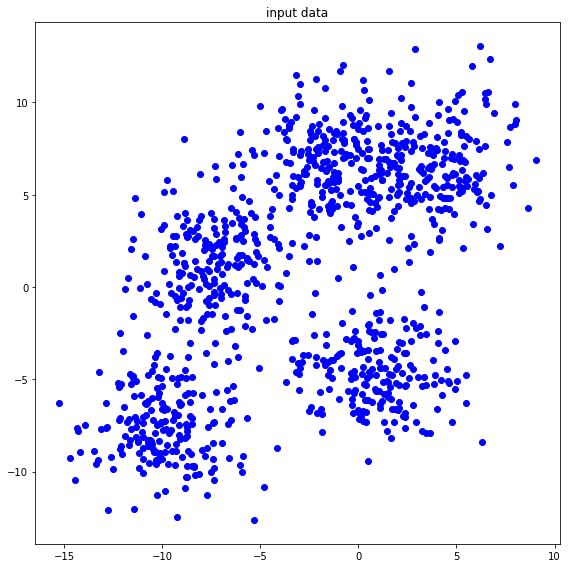

In [3]:
plt.figure(figsize=(8,8))   
plt.title('input data')

plt.scatter(x, y, color='blue')

plt.tight_layout()
plt.show()

## compute distance
- feature : $n \times m$, center : $1 \times m$, distance : $n \times 1$
- $n$ : number of data, $m$ : number of features

In [14]:
abc = np.array([1,2])

In [22]:
feature-abc

array([[-3.78158782,  4.13851704],
       [-6.79072687,  1.00770345],
       [-9.85288476,  1.99889271],
       ...,
       [ 7.01075285,  7.06955099],
       [ 0.12859575, -4.53389057],
       [-0.96276619,  6.87194034]])

In [24]:
np.shape(np.sum((feature-abc)**2, axis = 1))

(1000,)

In [27]:
a = np.array([0,0])
b = np.array([3,4])

np.sqrt(np.sum((a-b)**2, axis =0 ))

5.0

In [ ]:
np.sqrt(np.sum((feature-abc)**2, axis = 1))

In [13]:
feature

array([[-2.78158782,  6.13851704],
       [-5.79072687,  3.00770345],
       [-8.85288476,  3.99889271],
       ...,
       [ 8.01075285,  9.06955099],
       [ 1.12859575, -2.53389057],
       [ 0.03723381,  8.87194034]])

In [30]:
def compute_distance(feature, center):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    distance = np.sqrt(np.sum((feature-center)**2, axis = 1))

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return distance

## compute centroid
- feature : $n \times m$, label_feature : $n \times 1$, value_label : $1 \times 1$, centroid : $1 \times m$
- $n$ : number of data, $m$ : number of features

In [31]:
lab        = np.random.randint(0, 2, size=(number_data))

In [36]:
np.shape(lab)

(1000,)

In [63]:
np.mean(feature[lab == 1],axis = 0)

array([-2.90621111,  0.60565659])

In [66]:
feature[lab == 1]

array([[-2.78158782e+00,  6.13851704e+00],
       [-5.79072687e+00,  3.00770345e+00],
       [-1.05144286e+01, -6.02698072e+00],
       [ 1.94045737e+00,  6.50385870e+00],
       [ 3.70321502e-01, -5.33296517e+00],
       [ 1.09174399e+00,  6.46251768e-01],
       [-1.84469926e+00, -6.89748133e+00],
       [-2.05182018e-01, -2.78636349e+00],
       [ 5.56187907e-01,  2.91587817e+00],
       [-2.35905817e+00, -1.49118456e+00],
       [ 2.83790103e+00,  4.65805973e+00],
       [-4.80086411e+00,  7.23511768e+00],
       [ 5.28748884e+00,  5.38469033e+00],
       [ 4.07755207e+00,  9.30279952e+00],
       [-8.13029171e+00,  3.62077762e+00],
       [-2.81427776e+00, -3.70042585e+00],
       [-8.72919829e+00,  2.69449530e+00],
       [ 5.25622742e+00,  8.25435563e+00],
       [-9.12573688e+00, -8.02453640e+00],
       [ 1.56948446e+00, -4.69676573e+00],
       [ 2.37574897e+00,  6.01791259e+00],
       [-4.80705148e+00, -1.08439688e+01],
       [ 1.01336027e-01,  9.60506093e+00],
       [-1.

In [68]:
np.sum(feature[lab == 1][:,1]) / np.shape(feature[lab == 1])[0]

0.6056565887407951

In [42]:
feature_lab = np.column_stack((feature, lab))

In [153]:
np.shape(feature_lab[feature_lab[:,2] == 1][:,:2])

(481, 2)

In [170]:
lab

array([1, 1, 0, 0, 1])

In [175]:
compute_centroid(feature[:5], lab, 2)

array([nan, nan])

In [155]:
def compute_centroid(feature, label_feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    centroid = np.mean(feature[label_feature == label], axis = 0)
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return centroid

## compute label
- distance : $n \times k$, label_feature : $n \times 1$
- $n$ : number of data, $k$ : number of clusters

In [124]:
a = np.array([[1,2],[4,5],[3,1],[4,5],[2,6]])

In [84]:
lab   = np.random.randint(0, 2, size=(5))

In [127]:
a

array([[1, 2],
       [4, 5],
       [3, 1],
       [4, 5],
       [2, 6]])

In [130]:
np.min(a, axis=1)

array([1, 4, 1, 4, 2])

In [94]:
np.shape(np.argmin(a, axis= 1))

(5,)

In [93]:
np.shape(np.argmin(a, axis= 1).reshape(1,5))

(1, 5)

In [95]:
def compute_label(distance):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    label_feature = np.argmin(distance, axis = 1)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return label_feature


## the number of clusters $K = 2$

In [98]:
smap   = np.zeros((10,2,2))

In [114]:
smap[0,0,:]

array([0., 0.])

In [106]:
np.shape(feature)

(1000, 2)

In [111]:
samp

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [110]:
samp[:,1] = 1

In [189]:
number_cluster          = 2
number_iteration        = 100     # you can modify this value
loss_iteration_02       = np.zeros(number_iteration)
centroid_iteration_02   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_02        = np.random.randint(0, number_cluster, size=(number_data))

In [190]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#

for i in range(number_iteration):
    loss = 0
    distance = np.zeros((number_data, number_cluster))
    
    for j in range(number_cluster):
        centroid = compute_centroid(feature, label_feature_02, j)
        if np.isnan(centroid).any():
            centroid = centroid_iteration_02[i-1, j, :]
        
        centroid_iteration_02[i, j, :] = centroid
        distance[:, j] = compute_distance(feature, centroid)

    label_feature_02 = compute_label(distance)

    loss = np.mean(np.min(distance**2, axis = 1))
    loss_iteration_02[i] = loss
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

In [144]:
centroid = compute_centroid(feature, label_feature_02, 1)
np.shape(compute_distance(feature, centroid))

(1000,)

In [145]:
distance

array([[0., 0.],
       [0., 0.]])

In [187]:
if np.isnan(abc).all():
    print('abc')

In [183]:
abc = np.array([4, np.NaN])

In [193]:
loss_iteration_02

array([65.23092476, 32.78149853, 31.81729846, 31.27901866, 31.15241983,
       31.1226272 , 31.11696497, 31.11361055, 31.11233562, 31.11233562,
       31.11233562, 31.11233562, 31.11233562, 31.11233562, 31.11233562,
       31.11233562, 31.11233562, 31.11233562, 31.11233562, 31.11233562,
       31.11233562, 31.11233562, 31.11233562, 31.11233562, 31.11233562,
       31.11233562, 31.11233562, 31.11233562, 31.11233562, 31.11233562,
       31.11233562, 31.11233562, 31.11233562, 31.11233562, 31.11233562,
       31.11233562, 31.11233562, 31.11233562, 31.11233562, 31.11233562,
       31.11233562, 31.11233562, 31.11233562, 31.11233562, 31.11233562,
       31.11233562, 31.11233562, 31.11233562, 31.11233562, 31.11233562,
       31.11233562, 31.11233562, 31.11233562, 31.11233562, 31.11233562,
       31.11233562, 31.11233562, 31.11233562, 31.11233562, 31.11233562,
       31.11233562, 31.11233562, 31.11233562, 31.11233562, 31.11233562,
       31.11233562, 31.11233562, 31.11233562, 31.11233562, 31.11

In [185]:
if np.isnan(compute_centroid(feature[:5], lab, 2)).any():
    print('abc')

abc


/home/nextgen/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/nextgen/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


## the number of clusters $K = 4$

In [9]:
number_cluster          = 4
number_iteration        = 2     # you can modify this value
loss_iteration_04       = np.zeros(number_iteration)
centroid_iteration_04   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_04        = np.random.randint(0, number_cluster, size=(number_data))

In [10]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#

for i in range(number_iteration):
    loss = 0
    distance = np.zeros((number_data, number_cluster))
    
    for j in range(number_cluster):
        centroid = compute_centroid(feature, label_feature_04, j)
        if np.isnan(centroid).any():
            centroid = centroid_iteration_04[i-1, j, :]
        
        centroid_iteration_04[i, j, :] = centroid
        distance[:, j] = compute_distance(feature, centroid)

    label_feature_04 = compute_label(distance)

    loss = np.mean(np.min(distance**2, axis = 1))
    loss_iteration_04[i] = loss
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

## the number of clusters $K = 8$

In [11]:
number_cluster          = 8
number_iteration        = 2     # you can modify this value
loss_iteration_08       = np.zeros(number_iteration)
centroid_iteration_08   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_08        = np.random.randint(0, number_cluster, size=(number_data))

In [12]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#

for i in range(number_iteration):
    loss = 0
    distance = np.zeros((number_data, number_cluster))
    
    for j in range(number_cluster):
        centroid = compute_centroid(feature, label_feature_08, j)
        if np.isnan(centroid).any():
            centroid = centroid_iteration_08[i-1, j, :]
        
        centroid_iteration_08[i, j, :] = centroid
        distance[:, j] = compute_distance(feature, centroid)

    label_feature_08 = compute_label(distance)

    loss = np.mean(np.min(distance**2, axis = 1))
    loss_iteration_08[i] = loss
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

## the number of clusters $K = 16$

In [219]:
loss_iteration_16 

array([41.46020846,  8.97363322,  5.89813503,  4.955761  ,  4.53030594,
        4.2841377 ,  4.08603333,  3.90747663,  3.77970137,  3.66292833,
        3.59418081,  3.55393989,  3.5051476 ,  3.41323325,  3.3420598 ,
        3.30209089,  3.28696796,  3.28473975,  3.28271372,  3.28247814,
        3.2821403 ,  3.2815498 ,  3.28104163,  3.28104163,  3.28104163,
        3.28104163,  3.28104163,  3.28104163,  3.28104163,  3.28104163,
        3.28104163,  3.28104163,  3.28104163,  3.28104163,  3.28104163,
        3.28104163,  3.28104163,  3.28104163,  3.28104163,  3.28104163,
        3.28104163,  3.28104163,  3.28104163,  3.28104163,  3.28104163,
        3.28104163,  3.28104163,  3.28104163,  3.28104163,  3.28104163,
        3.28104163,  3.28104163,  3.28104163,  3.28104163,  3.28104163,
        3.28104163,  3.28104163,  3.28104163,  3.28104163,  3.28104163,
        3.28104163,  3.28104163,  3.28104163,  3.28104163,  3.28104163,
        3.28104163,  3.28104163,  3.28104163,  3.28104163,  3.28

In [217]:
number_cluster          = 16
number_iteration        = 100     # you can modify this value
loss_iteration_16       = np.zeros(number_iteration)
centroid_iteration_16   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_16        = np.random.randint(0, number_cluster, size=(number_data))

In [218]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#

for i in range(number_iteration):
    loss = 0
    distance = np.zeros((number_data, number_cluster))
    
    for j in range(number_cluster):
        centroid = compute_centroid(feature, label_feature_16, j)
        if np.isnan(centroid).any():
            centroid = centroid_iteration_16[i-1, j, :]
        
        centroid_iteration_16[i, j, :] = centroid
        distance[:, j] = compute_distance(feature, centroid)

    label_feature_16 = compute_label(distance)

    loss = np.mean(np.min(distance**2, axis = 1))
    loss_iteration_16[i] = loss
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

---

---

## functions for presenting the results

---

---

In [191]:
def function_result_01():

    print("final loss (K=2) = {:13.10f}".format(loss_iteration_02[-1]))
    

In [16]:
def function_result_02():

    print("final loss (K=4) = {:13.10f}".format(loss_iteration_04[-1]))
    

In [17]:
def function_result_03():

    print("final loss (K=8) = {:13.10f}".format(loss_iteration_08[-1]))
    

In [18]:
def function_result_04():

    print("final loss (K=16) = {:13.10f}".format(loss_iteration_16[-1]))
    

In [19]:
def function_result_05():
    
    plt.figure(figsize=(8,6)) 
    plt.title('loss (K=2)')

    plt.plot(loss_iteration_02, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [20]:
def function_result_06():
    
    plt.figure(figsize=(8,6)) 
    plt.title('loss (K=4)')

    plt.plot(loss_iteration_04, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [21]:
def function_result_07():
    
    plt.figure(figsize=(8,6))
    plt.title('loss (K=8)')

    plt.plot(loss_iteration_08, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [22]:
def function_result_08():
    
    plt.figure(figsize=(8,6))
    plt.title('loss (K=16)')

    plt.plot(loss_iteration_16, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [23]:
def function_result_09():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=2)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [24]:
def function_result_10():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=4)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [25]:
def function_result_11():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=8)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [26]:
def function_result_12():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=16)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [27]:
def function_result_13():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=2)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [28]:
def function_result_14():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=4)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [29]:
def function_result_15():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=8)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [30]:
def function_result_16():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=16)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

---

---

## results

---

---

In [192]:
number_result = 16

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)

**************************************************
## [RESULT 01]
**************************************************
final loss (K=2) = 31.1123356206
**************************************************
## [RESULT 02]
**************************************************


NameError: name 'function_result_02' is not defined